In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [80]:
sample_size = 100
nr_sample = 20
nr_moments = 5

### Bounded distributions

In [81]:
bounded_dists = dm.get_bounded_distribution()
#dm.plot_histograms_of_samples(bounded_dists, sample_size, nr_sample)

In [82]:
moments_df = dem.get_moments_df(bounded_dists, nr_moments, nr_sample, sample_size)
moments_df.head()

,m1,m2,m3,m4,m5,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,arcsine
3,0.471492,0.128040,0.000715,0.024022,0.000901,arcsine
4,0.541186,0.126426,-0.008496,0.023988,-0.003463,arcsine


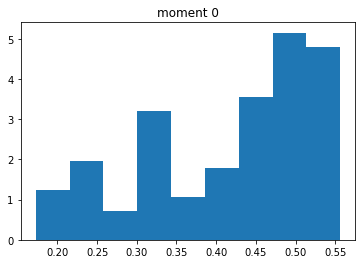

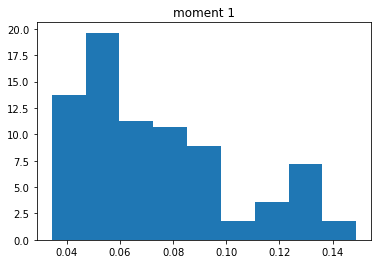

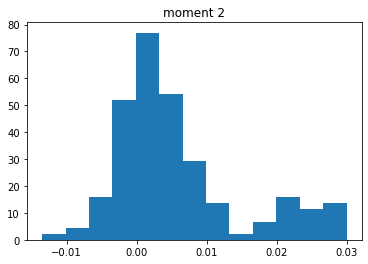

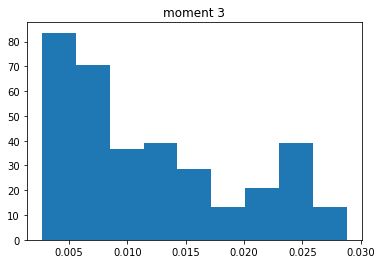

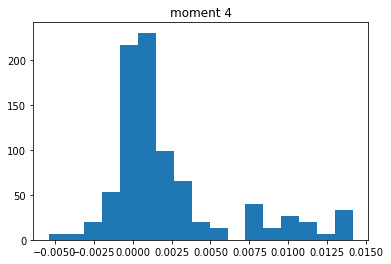

In [29]:
dem.get_histogram_of_moments(moments_df)

In [32]:
test_size = 0.2
cv = 5

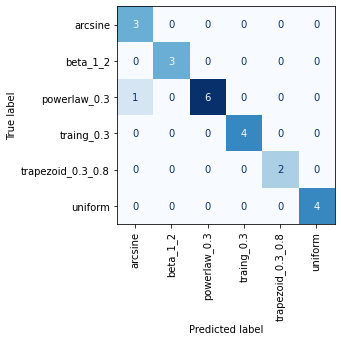

array([1., 1., 1., 1., 1.])

In [59]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [119]:
# testing number of smaples vs accuracy
acc_mean = []
acc_std = []
nr_sample_list = list(range(10,100))

for i in moments_list:
    moments_df = dem.get_moments_df(bounded_dists, nr_moments, i, sample_size)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

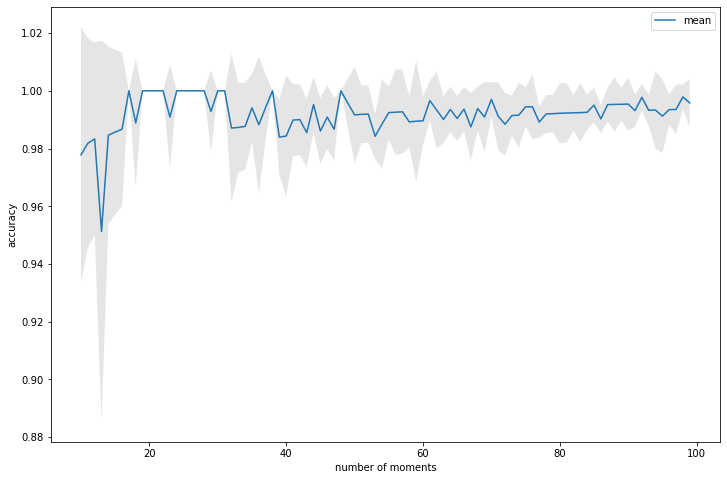

In [120]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_sample_list,acc_mean, label='mean')

plt.gca().fill_between(nr_sample_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend()

In [127]:
# testing number of moments vs accuracy
acc_mean = []
acc_std = []
nr_moments_list = list(range(2,40))

for i in nr_moments_list:
    moments_df = dem.get_moments_df(bounded_dists, i, nr_sample, sample_size)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

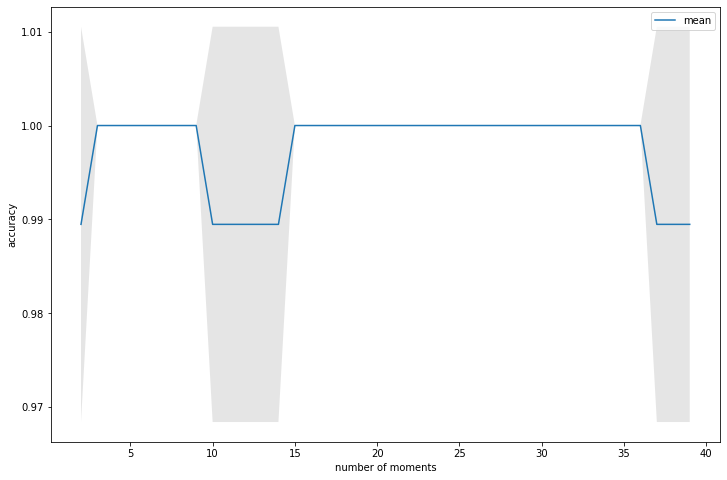

In [128]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_moments_list,acc_mean, label='mean')

plt.gca().fill_between(nr_moments_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend()

### Longtail distributions

In [72]:
longtail_dists = dm.get_longtail_distribution()
#dm.plot_histograms_of_samples(longtail_dists, sample_size, nr_sample)

In [77]:
moments_df = dem.get_moments_df(longtail_dists, nr_moments, nr_sample, sample_size)
moments_df.head()

,m1,m2,dist
0,2.694987,43.363212,cauchy
1,1.678578,9.860843,cauchy
2,3.143346,46.276931,cauchy
3,3.546117,194.855215,cauchy
4,2.835260,24.799479,cauchy


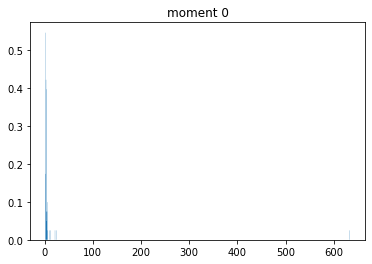

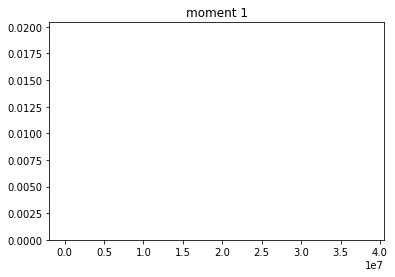

In [79]:
dem.get_histogram_of_moments(moments_df)

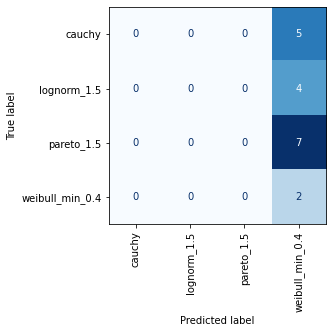

array([0.28571429, 0.28571429, 0.28571429, 0.35714286, 0.28571429])

In [70]:
cm.svm_model(moments_df, test_size, cv, plot=1)